In [1]:
# %cd drive/MyDrive/Colab\ Notebooks/COMP8420

/content/drive/MyDrive/Colab Notebooks/COMP8420


In [13]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from typing import Tuple
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
def load_data(path:str, mode:str)-> DataFrame:
    """This function load data from specific data file based on mode

    Args:
        path (str): path to folder contains data file
        mode (str): what data to be loaded

    Returns:
        DataFrame: DataFrame contains all data
    """
    assert mode in ["gsr", "pupil", "skin", "all"], f"mode should be 'gsr','pupil','all'. Not {mode}"
    # read data gsr
    if mode in ['gsr', 'all']:
        df_gsr = pd.read_excel(path+'gsr_features.xlsx',sheet_name='data')
        df_gsr.columns = ['patient'] + list(df_gsr.columns)[1:]
        if mode == 'gsr':
            return df_gsr
    # read pupil data
    if mode in ['pupil', 'all']:
        df_pupil = pd.read_excel(path+'pupil_features.xlsx',sheet_name='data')
        df_pupil.columns = ['patient'] + list(df_pupil.columns)[1:]
        if mode == 'pupil':
            return df_pupil
    # read skin temperature data
    if mode in ['skin', 'all']:
        df_skin = pd.read_excel(path+'skintemp_features.xlsx',sheet_name='data')
        df_skin.columns = ['patient'] + list(df_skin.columns)[1:]
        if mode == 'skin':
            return df_skin
    # in case of using all data, combine
    data = pd.concat([df_gsr,df_pupil,df_skin],axis = 1)
    # remove duplicated columns
    data = data.loc[:,~data.columns.duplicated()]
    return data

def df_to_xy(df:DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """Convert dataframe to X and Y array

    Args:
        df (DataFrame): [description]

    Returns:
        Tuple[np.ndarray, np.ndarray]: [description]
    """
    df = df.apply(pd.to_numeric)
    x = df.values[:,1:]
    y = df.values[:,0]
    return x,y

In [7]:
dataset = load_data('./data/','all')

In [8]:
dataset.head()

,patient,depr_label,min_normalised_gsr,max_normalised_gsr,mean_normalised_gsr,std_normalised_gsr,var_normalised_gsr,rms_normalised_gsr,min_filtered_gsr,max_filtered_gsr,mean_filtered_gsr,std_filtered_gsr,var_filtered_gsr,rms_filtered_gsr,first_diff_normalised_gsr_abs_mean,second_diff_normalised_gsr_abs_mean,first_diff_filtered_gsr_abs_mean,second_diff_filtered_gsr_abs_mean,num_normalised_gsr_peaks,num_filtered_gsr_peaks,vlp_sc_scr_occurrences,lp_sc_scr_occurrences,mean_vlp_sc_scr_amplitudes,mean_lp_sc_scr_amplitudes,ratio_scr_occurrence_vlp_lp,min_normalised_pupil_left,max_normalised_pupil_left,mean_normalised_pupil_left,std_normalised_pupil_left,var_normalised_pupil_left,rms_normalised_pupil_left,first_diff_normalised_pupil_left_abs_mean,second_diff_normalised_pupil_left_abs_mean,vlp_pd_left_peak_occurrences,lp_pd_left_peak_occurrences,mean_vlp_pd_left_peak_amplitudes,mean_lp_pd_left_peak_amplitudes,ratio_peak_occurrence_vlp_lp_left,min_normalised_pupil_right,max_normalised_pupil_right,...,lp_pd_right_peak_occurrences,mean_vlp_pd_right_peak_amplitudes,mean_lp_pd_right_peak_amplitudes,ratio_peak_occurrence_vlp_lp_right,min_normalised_pupil_avg,max_normalised_pupil_avg,mean_normalised_pupil_avg,std_normalised_pupil_avg,var_normalised_pupil_avg,rms_normalised_pupil_avg,first_diff_normalised_pupil_avg_abs_mean,second_diff_normalised_pupil_avg_abs_mean,vlp_pd_avg_peak_occurrences,lp_pd_avg_peak_occurrences,mean_vlp_pd_avg_peak_amplitudes,mean_lp_pd_avg_peak_amplitudes,ratio_peak_occurrence_vlp_lp_avg,min_normalised_skintemp,max_normalised_skintemp,mean_normalised_skintemp,std_normalised_skintemp,var_normalised_skintemp,rms_normalised_skintemp,min_filtered_skintemp,max_filtered_skintemp,mean_filtered_skintemp,std_filtered_skintemp,var_filtered_skintemp,rms_filtered_skintemp,first_diff_normalised_skintemp_abs_mean,second_diff_normalised_skintemp_abs_mean,first_diff_filtered_skintemp_abs_mean,second_diff_filtered_skintemp_abs_mean,num_normalised_skintemp_peaks,num_filtered_skintemp_peaks,vlp_skintemp_peak_occurrences,lp_skintemp_peak_occurrences,mean_vlp_skintemp_peak_amplitudes,mean_lp_skintemp_peak_amplitudes,ratio_skintemp_peak_occurrence_vlp_lp
0,p02,2,0.716610,0.970557,0.821910,0.072007,0.005185,0.825042,0.980664,1.405398,1.093152,0.089455,0.008002,1.096787,0.002890,0.005010,0.004036,0.007852,25,4,2,4,0.311795,0.003057,0.500000,0.062619,1.000000,0.457270,0.107560,0.011569,0.469746,0.005593,0.010749,3,7,0.085589,0.009063,0.428571,0.080521,0.808790,...,8,0.081746,0.039948,0.375000,0.186450,0.740159,0.458688,0.092058,0.008475,0.467832,0.005146,0.009665,3,7,0.084876,0.015439,0.428571,0.515152,0.696970,0.610638,0.045725,0.002091,0.612338,34.231146,41.598373,36.515231,0.896728,0.804122,36.526183,0.002459,0.004944,0.071831,0.137465,8,7,2,10,0.166276,0.002174,0.200000
1,p02,2,0.553351,0.718968,0.630662,0.047855,0.002290,0.632464,0.803887,0.975663,0.888117,0.050970,0.002598,0.889570,0.001769,0.002355,0.001120,0.002237,31,1,1,2,0.352041,-0.023859,0.500000,0.103427,0.621802,0.437777,0.072130,0.005203,0.443677,0.004263,0.007932,2,6,0.151699,-0.009168,0.333333,0.109578,0.892465,...,6,0.146816,-0.022414,0.333333,0.229917,0.744920,0.418360,0.075994,0.005775,0.425203,0.004062,0.007651,2,6,0.150118,-0.023708,0.333333,0.674242,0.772727,0.729490,0.025189,0.000634,0.729922,36.509773,36.616778,36.564575,0.030837,0.000951,36.564588,0.002556,0.005144,0.001383,0.002745,7,6,1,4,0.329021,-0.064926,0.250000
2,p02,2,0.530042,0.873545,0.607463,0.073371,0.005383,0.611853,0.775245,1.096903,0.851721,0.073617,0.005420,0.854879,0.004466,0.008214,0.003895,0.007815,24,2,1,2,0.387183,0.179955,0.500000,0.135976,0.825385,0.456620,0.083384,0.006953,0.464168,0.003841,0.007283,3,7,0.070076,0.004254,0.428571,0.107601,0.930919,...,6,0.063408,0.018651,0.500000,0.290428,0.769651,0.468121,0.090531,0.008196,0.476791,0.005282,0.010165,3,7,0.067433,0.009914,0.428571,0.772727,0.863636,0.821453,0.028027,0.000786,0.821928,36.614825,36.742154,36.686625,0.035828,0.001284,36.686643,0

In [9]:
del dataset['patient']

In [11]:
train_x, train_y = df_to_xy(dataset)
mean_train_x = train_x.mean(axis=0)
std_train_x = train_x.std(axis=0)
normalize_train_x = (train_x - mean_train_x)/std_train_x

In [12]:
# fit data into kmean
kmeans = KMeans(n_clusters=4)
kmeans.fit(normalize_train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# use PCA to visualize in 2D
pca = PCA(n_components=2)
pca_x = pca.fit_transform(normalize_train_x)

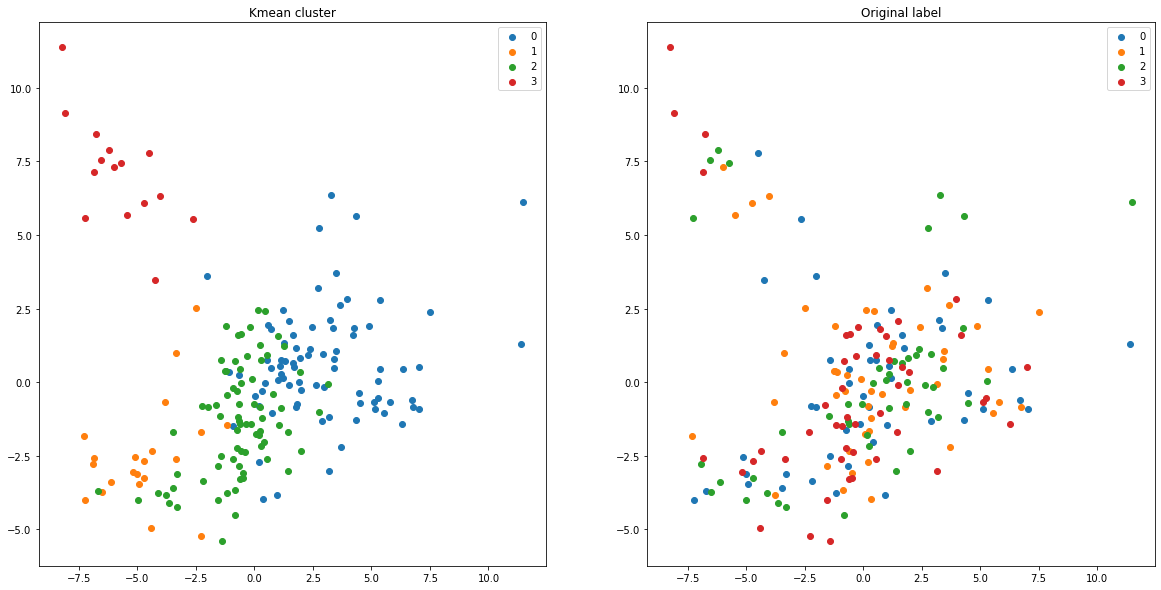

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
for i in range(4):
    index = np.where(kmeans.labels_ == i)[0]
    plt.scatter(pca_x[index,0],pca_x[index,1], label=str(i))
plt.title('Kmean cluster')
plt.legend()
plt.subplot(1,2,2)
for i in range(4):
    index = np.where(train_y == i)[0]
    plt.scatter(pca_x[index,0],pca_x[index,1], label=str(i))
plt.title('Original label')
plt.legend()
plt.show()